In [33]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import emoji
import torch
import json
import time

from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [35]:
import json
import time
import pandas as pd
from collections import Counter
import torch

import pandas as pd
import numpy as np
import nltk
import string
import re
import emoji
import torch
import json
import time
import numpy as np

from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [36]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as sch

#import April12.ipynb
#%store -r icd_grouped 
import statsmodels.api as sm
from patsy import dmatrices 

# model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

import seaborn


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

[]


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# getting the twitter comments
DATA_PATH = '../data/twitter-data-cleaned.txt'
with open(DATA_PATH, 'r',  encoding="utf-8") as f:
    data = f.readlines()
data = [d.strip() for d in data if d.strip() != '']
print('Tweets')
print(data[:3])
print(len(data))

"""
data[0]
'💫 IT’S BURGER MONDAY, CBUS! 💫 Order any Gourmet Burger with a draft beer 🍔🍺 ifor just $9.99 when you dine in. 💪 Cer…'
"""


# getting our 15 chosen emojis
SELECTED_EMOJIS_PATH = '../data/best-emojis.json'
with open(SELECTED_EMOJIS_PATH, 'r') as f:
    EMOJIS = json.load(f)
EMOJI_CHARS = [e['char'] for e in EMOJIS]
print('Chosen emojis')
print(EMOJI_CHARS)
print(len(EMOJI_CHARS))

ALL_EMOJIS = set(emoji.emojize(emoji_code) for emoji_code in emoji.UNICODE_EMOJI.values())

Tweets
['💫 IT’S BURGER MONDAY, CBUS! 💫 Order any Gourmet Burger with a draft beer 🍔🍺 ifor just $9.99 when you dine in. 💪 Cer…', 'Stay strong 💪 You are an amazing man. I appreciate the truth that is told.', 'Code Sale Awesome from Styli 💪']
122179
Chosen emojis
['😂', '😍', '😭', '😊', '💕', '😒', '😉', '👌', '👍', '🙏', '👀', '🔥', '💯', '👏', '💪']
15


In [9]:
EMOJI_CHARS

['😂', '😍', '😭', '😊', '💕', '😒', '😉', '👌', '👍', '🙏', '👀', '🔥', '💯', '👏', '💪']

In [8]:
EMOJIS

[{'char': '😂',
  'id': '1F602',
  'name': 'FACE WITH TEARS OF JOY',
  'score': 3021141117},
 {'char': '😍',
  'id': '1F60D',
  'name': 'SMILING FACE WITH HEART-SHAPED EYES',
  'score': 1075104412},
 {'char': '😭',
  'id': '1F62D',
  'name': 'LOUDLY CRYING FACE',
  'score': 1030773227},
 {'char': '😊',
  'id': '1F60A',
  'name': 'SMILING FACE WITH SMILING EYES',
  'score': 689177417},
 {'char': '💕', 'id': '1F495', 'name': 'TWO HEARTS', 'score': 531924123},
 {'char': '😒', 'id': '1F612', 'name': 'UNAMUSED FACE', 'score': 521103383},
 {'char': '😉', 'id': '1F609', 'name': 'WINKING FACE', 'score': 347699779},
 {'char': '👌', 'id': '1F44C', 'name': 'OK HAND SIGN', 'score': 383889022},
 {'char': '👍', 'id': '1F44D', 'name': 'THUMBS UP SIGN', 'score': 320877845},
 {'char': '🙏',
  'id': '1F64F',
  'name': 'PERSON WITH FOLDED HANDS',
  'score': 299213580},
 {'char': '👀', 'id': '1F440', 'name': 'EYES', 'score': 295390335},
 {'char': '🔥', 'id': '1F525', 'name': 'FIRE', 'score': 278917156},
 {'char': '💯'

In [5]:
len(data)

122179

In [6]:
data[0]

'💫 IT’S BURGER MONDAY, CBUS! 💫 Order any Gourmet Burger with a draft beer 🍔🍺 ifor just $9.99 when you dine in. 💪 Cer…'

In [12]:
# preprocessing the data
from parsing import Tokenizer, TokenType, Token
tokenizer = Tokenizer(EMOJI_CHARS)
# take 3 previous words as context for the emoji
context = {e:[] for e in EMOJI_CHARS}
emojiToId = {e:i for i,e in enumerate(EMOJI_CHARS)}

for tweet in data:
    tokens = tokenizer.tokenize(tweet)
    for i,token in enumerate(tokens):
        if token.token_type == TokenType.EMOJIS:
            closest = tokenizer.findClosestNWords(5, tokens, i)
            if closest:
                context[token.raw].append(closest)

for e, words in context.items():
    print(e)
    print(len(words))
    print(words[:10])
    
emoji_dict = list(context.items())

😂
8435
[['go', 'lol', 'postmen', 'familiar', 'face'], ['bollywood', 'reality'], ['got', 'even', 'though', 'debates', 'blasphemy'], ['got', 'even', 'though', 'debates', 'blasphemy'], ['game', 'strong'], ['game', 'strong'], ['add', 'head', 'rub', 'razzle', 'dazzle'], ['idea', 'silly', 'google', 'hang', 'santa'], ['sticks', 'stones', 'may', 'break', 'bones'], ['im', 'snowflake', 'hate', 'crime', 'speech']]
😍
7324
[['week', 'studio', 'figura', 'start', 'today'], ['days', 'go'], ['days', 'go'], ['advance', 'happy', 'birthday', 'thalaajith'], ['advance', 'happy', 'birthday', 'thalaajith'], ['advance', 'happy', 'birthday', 'thalaajith'], ['days', 'go'], ['days', 'go'], ['advance', 'happy', 'birthday', 'thalaajith'], ['advance', 'happy', 'birthday', 'thalaajith']]
😭
7419
[['thank', 'lol', 'procrastination', 'almost'], ['change', 'first', 'diaper', 'uncle', 'year'], ['deposit', 'yuan', 'set', 'must', 'buy'], ['deposit', 'yuan', 'set', 'must', 'buy'], ['deposit', 'yuan', 'set', 'must', 'buy'], [

In [15]:
ex = ' '.join(['thank', 'lol', 'procrastination', 'almost'])
ex

'thank lol procrastination almost'

In [53]:
emoji_dict = list(context.items())

In [54]:
len(emoji_dict)

15

In [57]:
emoji_dict[1][0]

'😍'

# array of words

In [17]:
#a string for each emoji
allwords_emoji = []
for e, words in context.items():
    emojistring = ''
    #print(e)
    print(len(words))
    #print(words[:10])
    for array in words:
        string = ' '.join(array)
        emojistring =  emojistring + ' ' + string
        
    allwords_emoji.append(emojistring)
        

8435
7324
7419
6327
6476
5846
5900
6017
6445
6760
5815
9876
6414
9211
6477


In [22]:
len(allwords_emoji)

15

In [18]:
allwords_emoji[0]

' go lol postmen familiar face bollywood reality got even though debates blasphemy got even though debates blasphemy game strong game strong add head rub razzle dazzle idea silly google hang santa sticks stones may break bones im snowflake hate crime speech got soon youre done happy th yung flight school julius erving mrji krlo tum bullywood walo aama wait watch became famous day crossed bro get addicted like last time folks play much folks play much folks play much right people need mind business abnormal behavior hahaha chaaar cheer wtf goin tell need btw mind i’ve said million times still charging maybe even day online session celtic btw geez butterfly’s man congratulations im struggling mine correct ncb sh… awesome love conversation awesome love conversation awesome love conversation looking forward updates tomorrow lessons th grade civics senators civics lesson ‘ya jack wagon’ queen cameo pronounce name right awesome lol l wish could time hard arguing man typed whole hard arguing 

# data cleaning, remove stopwords, stem each word to its root

In [19]:
import re
import nltk

In [20]:
# We need this dataset in order to use the tokenizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Also download the list of stopwords to filter out
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kathy908000/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kathy908000/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#input text format
def process_text(text):
    # Make all the strings lowercase and remove non alphabetic characters
    text = re.sub('[^A-Za-z]', ' ', text.lower())

    # Tokenize the text; this is, separate every sentence into a list of words
    tokenized_text = word_tokenize(text)

    # Remove the stopwords and stem each word to its root
    clean_text = [
        stemmer.stem(word) for word in tokenized_text
        if word not in stopwords.words('english')
    ]

    #final output is a list of words
    return clean_text

In [25]:
cleanwords = [process_text(allwords_emoji[0])]
"""
['get',
 'covid',
 'recov',
 'die',
 'complic']
 """

cleanwords 

[['go',
  'lol',
  'postmen',
  'familiar',
  'face',
  'bollywood',
  'realiti',
  'got',
  'even',
  'though',
  'debat',
  'blasphemi',
  'got',
  'even',
  'though',
  'debat',
  'blasphemi',
  'game',
  'strong',
  'game',
  'strong',
  'add',
  'head',
  'rub',
  'razzl',
  'dazzl',
  'idea',
  'silli',
  'googl',
  'hang',
  'santa',
  'stick',
  'stone',
  'may',
  'break',
  'bone',
  'im',
  'snowflak',
  'hate',
  'crime',
  'speech',
  'got',
  'soon',
  'your',
  'done',
  'happi',
  'th',
  'yung',
  'flight',
  'school',
  'juliu',
  'erv',
  'mrji',
  'krlo',
  'tum',
  'bullywood',
  'walo',
  'aama',
  'wait',
  'watch',
  'becam',
  'famou',
  'day',
  'cross',
  'bro',
  'get',
  'addict',
  'like',
  'last',
  'time',
  'folk',
  'play',
  'much',
  'folk',
  'play',
  'much',
  'folk',
  'play',
  'much',
  'right',
  'peopl',
  'need',
  'mind',
  'busi',
  'abnorm',
  'behavior',
  'hahaha',
  'chaaar',
  'cheer',
  'wtf',
  'goin',
  'tell',
  'need',
  'btw',


In [26]:
cleanword_emoji = []
for i in range(len(allwords_emoji)):
    cleanword_emoji.append(' '.join(process_text(allwords_emoji[i])))  #tfidf, kmeans clustering
    #cleanword_memeformat_word.append([process_text(allwords_memeformat[i])]) #topic modeling

# Most Frequent Words

In [37]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    #cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
   
    vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
    #vec = CountVectorizer(max_df=0.5, min_df = 1).fit(corpus)
    
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:
#frequent words in all emoji
allwords_formatcombined = ' '.join(cleanword_emoji)
common_words = get_top_n_words([allwords_formatcombined], 250) #input should be an array not a string
for word, freq in common_words:
    print(word, freq)

thank 4548
love 4054
good 2852
get 2422
like 2365
one 2172
go 2161
look 2012
back 1879
pleas 1879
follow 1877
great 1777
well 1693
got 1630
day 1615
happi 1605
time 1527
know 1523
see 1509
best 1496
im 1433
new 1427
today 1338
amp 1310
need 1303
make 1261
much 1230
want 1185
right 1174
let 1165
work 1132
realli 1111
hope 1100
watch 1095
beauti 1073
ye 1062
keep 1052
alway 1042
play 1024
come 1019
support 1004
man 1000
say 989
na 966
done 964
shit 954
nice 940
birthday 929
game 911
awesom 906
win 882
still 872
year 871
us 850
dont 848
think 804
god 783
take 778
wait 761
would 758
even 748
peopl 744
fuck 744
way 741
feel 739
amaz 697
guy 690
congratul 688
team 685
first 680
code 669
oh 667
last 665
never 663
friend 654
bro 648
better 641
night 637
use 633
stay 629
vote 626
fan 625
give 601
thing 598
discount 597
start 590
lol 586
video 584
bless 580
post 578
singl 578
your 574
tweet 567
girl 566
next 559
help 531
absolut 528
wow 521
live 520
week 519
song 519
show 516
tri 507
ass 505
ars

In [40]:
for i in range(len(cleanword_emoji)):
    print('\n')
    print("emoji: " + str(i))
    common_words = get_top_n_words([cleanword_emoji[i]], 25) #input should be an array not a string
    for word, freq in common_words:
        print(word, freq)



emoji: 0
like 334
get 293
lol 271
one 243
love 223
know 217
go 186
na 183
got 174
time 153
see 148
shit 146
im 144
good 135
think 131
say 130
look 129
man 128
realli 127
make 125
still 117
fuck 115
thank 113
even 111
need 111


emoji: 1
love 806
beauti 388
look 324
happi 240
birthday 191
thank 173
good 151
cute 149
like 147
amaz 139
wow 135
one 135
see 126
gorgeou 119
omg 117
ye 113
back 101
pretti 100
oh 99
day 96
sell 95
much 94
new 89
im 88
get 86


emoji: 2
like 311
im 236
get 228
love 226
one 190
go 187
realli 169
got 160
time 148
na 147
know 145
cri 145
want 144
much 142
thank 129
even 129
need 127
look 113
omg 112
fuck 111
feel 108
make 108
still 108
good 107
pleas 104


emoji: 3
thank 1100
love 320
good 297
happi 252
look 174
day 160
much 157
like 153
hope 146
im 143
great 133
get 132
one 131
go 118
well 103
enjoy 103
welcom 103
ye 102
nice 100
see 99
time 99
pl 96
watch 93
alway 90
new 89


emoji: 4
love 1048
thank 776
happi 502
birthday 312
much 232
hope 188
good 185
beauti

# kmeans clustering

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = cleanword_emoji
tf_idf_vectorizor = TfidfVectorizer(max_df=0.95, min_df=2)  
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [43]:
len(tf_idf_array[0])

10476

In [44]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 1000):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster

        """

        if data.ndim == 1:
            data = data.reshape(-1, 1)

        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)

        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

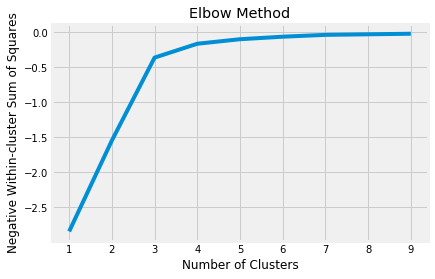

In [45]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

#elbow method 
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 1000) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Negative Within-cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


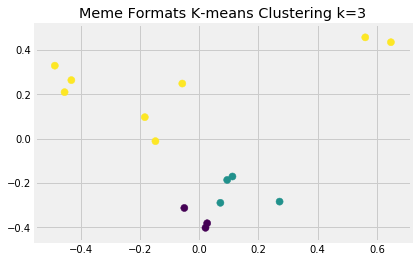

In [46]:
#k=4
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(3, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.title('Meme Formats K-means Clustering k=3')
#plt.ylabel("TFIDF Score")
#plt.xlabel("Words")
plt.show()
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [47]:
predicted_values

array([2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2])

In [58]:
#emojis in each cluster
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
for i in range(len(predicted_values)):
    if predicted_values[i] ==0:
        cluster1.append(emoji_dict[i][0])
        
    elif predicted_values[i] ==1:
        cluster2.append(emoji_dict[i][0])
    elif predicted_values[i] ==2:
        cluster3.append(emoji_dict[i][0])
    elif predicted_values[i] ==3:
        cluster4.append(memes_count.most_common()[i][0])

In [59]:
cluster1

['😍', '😊', '💕']

In [60]:
cluster2

['👌', '👍', '🙏', '👏']

In [61]:
cluster3

['😂', '😭', '😒', '😉', '👀', '🔥', '💯', '💪']

In [62]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 15 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [64]:
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 20) #x array, prediction, number of words
dfs


[                   features     score
 0                      amaz  0.246007
 1                   gorgeou  0.155055
 2                     bless  0.142333
 3                        hv  0.120142
 4                      sell  0.112963
 5                     twink  0.106062
 6                    awesom  0.095135
 7                       aww  0.089060
 8                      edit  0.086580
 9                     queen  0.084676
 10                     cuti  0.080196
 11                    hello  0.079592
 12                    angel  0.079215
 13              helixstudio  0.076463
 14                     site  0.074983
 15                   wowwww  0.072044
 16                     babe  0.067713
 17                      ili  0.065953
 18                   kindli  0.062875
 19  happybirthdaychackochan  0.061664,          features     score
 0          awesom  0.235531
 1           bless  0.156686
 2            amaz  0.133662
 3            amen  0.119412
 4       brilliant  0.113522
 5     

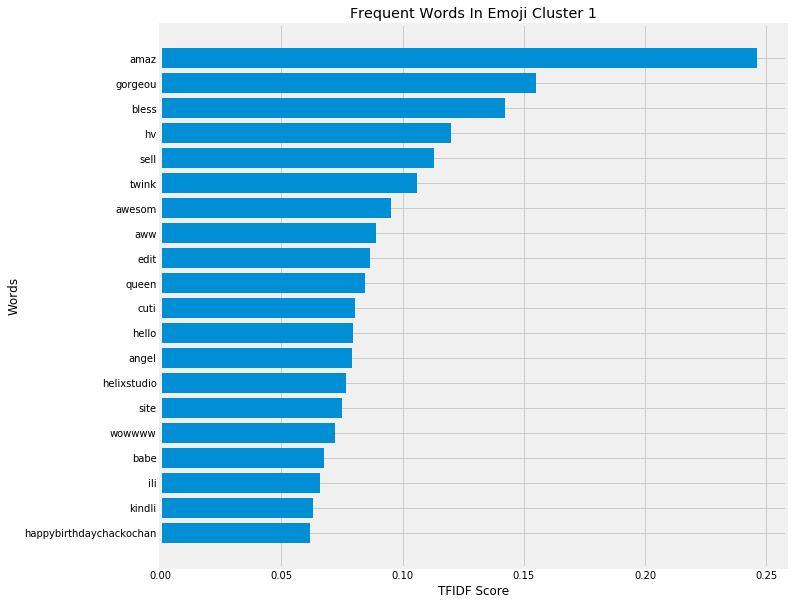

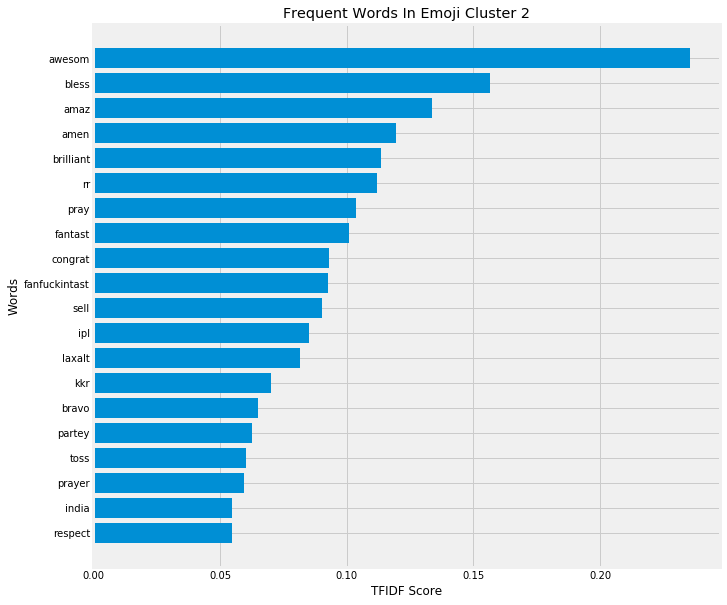

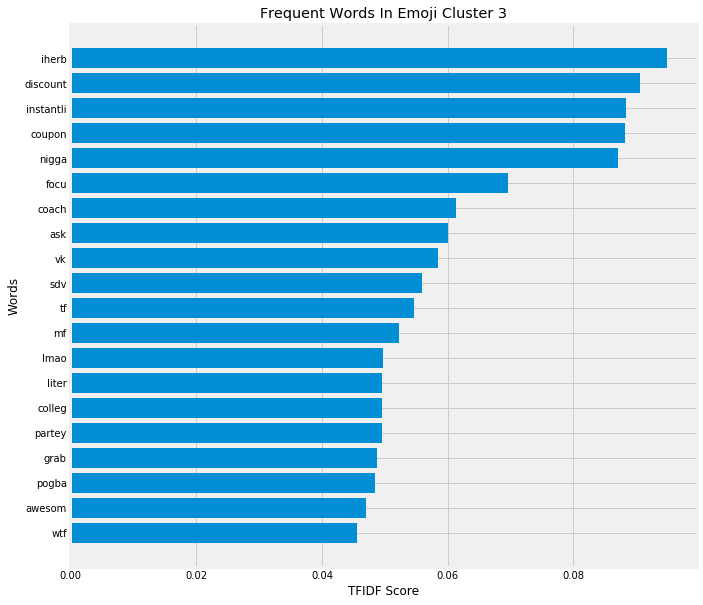

In [66]:
#barplot for each cluster
for i in range(len(dfs)):  
    fig = plt.figure(figsize=(10, 10))
    score = dfs[i]['score'][::-1]
    freqword = dfs[i]["features"][::-1]
    plt.barh(freqword , score)
    plt.title('Frequent Words In Emoji Cluster ' + str(i+1))
    plt.ylabel("Words")
    plt.xlabel("TFIDF Score")
    plt.show()

# K-means k=4

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


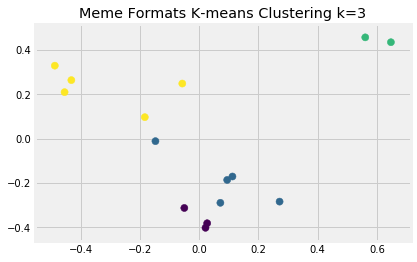

In [67]:
#k=4
test_e = Kmeans(4, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.title('Meme Formats K-means Clustering k=3')
plt.show()
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [68]:
predicted_values

array([3, 0, 3, 0, 0, 3, 1, 1, 1, 1, 3, 2, 3, 1, 2])

In [69]:
#emojis in each cluster
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
for i in range(len(predicted_values)):
    if predicted_values[i] ==0:
        cluster1.append(emoji_dict[i][0])
        
    elif predicted_values[i] ==1:
        cluster2.append(emoji_dict[i][0])
    elif predicted_values[i] ==2:
        cluster3.append(emoji_dict[i][0])
    elif predicted_values[i] ==3:
        cluster4.append(emoji_dict[i][0])

In [70]:
cluster1

['😍', '😊', '💕']

In [71]:
cluster2

['😉', '👌', '👍', '🙏', '👏']

In [72]:
cluster3

['🔥', '💪']

In [73]:
cluster4

['😂', '😭', '😒', '👀', '💯']

In [75]:
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 20) #x array, prediction, number of words
dfs


[                   features     score
 0                      amaz  0.246007
 1                   gorgeou  0.155055
 2                     bless  0.142333
 3                        hv  0.120142
 4                      sell  0.112963
 5                     twink  0.106062
 6                    awesom  0.095135
 7                       aww  0.089060
 8                      edit  0.086580
 9                     queen  0.084676
 10                     cuti  0.080196
 11                    hello  0.079592
 12                    angel  0.079215
 13              helixstudio  0.076463
 14                     site  0.074983
 15                   wowwww  0.072044
 16                     babe  0.067713
 17                      ili  0.065953
 18                   kindli  0.062875
 19  happybirthdaychackochan  0.061664,          features     score
 0          awesom  0.194309
 1           bless  0.126084
 2            amaz  0.126052
 3       instantli  0.109949
 4            amen  0.095529
 5     